# POC feature selection and Deep Learning model for AMP Parkinson's Disease Progression Prediction 

In [1]:
import pandas as pd
import numpy as np
import tqdm

In [2]:
#show more rows and columns:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
def pipeline_deep_learning_and_feature_selection():

    # drop upd23_clinical_state_on_medication column, because it is all NaN:
    df_peptides = pd.read_csv("../input/amp-parkinsons-disease-progression-prediction/train_peptides.csv")
    df_proteins = pd.read_csv("../input/amp-parkinsons-disease-progression-prediction/train_proteins.csv")
    df_clinical = pd.read_csv("../input/amp-parkinsons-disease-progression-prediction/train_clinical_data.csv")

    # add a column for each peptide and protein to the clinical data
    list_of_peptides = df_peptides["Peptide"].unique()
    list_of_proteins = df_proteins["UniProt"].unique()

    # add a column for each peptide and protein to the clinical data, fill with NaN:
    for peptide in list_of_peptides:
        df_clinical[peptide] = np.nan
    for protein in list_of_proteins:
        df_clinical[protein] = np.nan

    print("current shape of the dataframe: ",df_clinical.shape)

    #Fill the new empty columns with the values from the peptide and protein dataframes:
    for index, row in tqdm.tqdm(df_peptides.iterrows()):
        df_clinical.loc[df_clinical["visit_id"] == row["visit_id"], row["Peptide"]] = row["PeptideAbundance"]

    for index, row in tqdm.tqdm(df_proteins.iterrows()):
        df_clinical.loc[df_clinical["visit_id"] == row["visit_id"], row["UniProt"]] = row["NPX"]

    df_clinical = df_clinical.drop(columns=["upd23b_clinical_state_on_medication"])

    df_clinical_updrs1 = df_clinical.copy()
    df_clinical_updrs2 = df_clinical.copy()
    df_clinical_updrs3 = df_clinical.copy()
    df_clinical_updrs4 = df_clinical.copy()

    #drop all other target columns from the copies:
    df_clinical_updrs1 = df_clinical_updrs1.drop(columns=["updrs_2", "updrs_3", "updrs_4"])
    df_clinical_updrs2 = df_clinical_updrs2.drop(columns=["updrs_1", "updrs_3", "updrs_4"])
    df_clinical_updrs3 = df_clinical_updrs3.drop(columns=["updrs_1", "updrs_2", "updrs_4"])
    df_clinical_updrs4 = df_clinical_updrs4.drop(columns=["updrs_1", "updrs_2", "updrs_3"])


    # do this but now with a loop over all 4 target dataframes:
    list_of_dataframes = [df_clinical_updrs1, df_clinical_updrs2, df_clinical_updrs3, df_clinical_updrs4]
    list_of_target_columns = ["updrs_1", "updrs_2", "updrs_3", "updrs_4"]

    list_of_output_dataframes = []
    for i in range(len(list_of_dataframes)):
        df = list_of_dataframes[i]
        target_column = list_of_target_columns[i]
        df = df.dropna(subset=[target_column])
        df = df.fillna(0)
        df = df.drop(columns=["patient_id", "visit_id"])
        list_of_output_dataframes.append(df)
    return list_of_output_dataframes



In [4]:
list_of_dataframes = pipeline_deep_learning_and_feature_selection()

981834it [03:05, 5283.91it/s]
232741it [00:43, 5395.44it/s]


IndexError: list assignment index out of range

In [ ]:
list_of_dataframes

[]

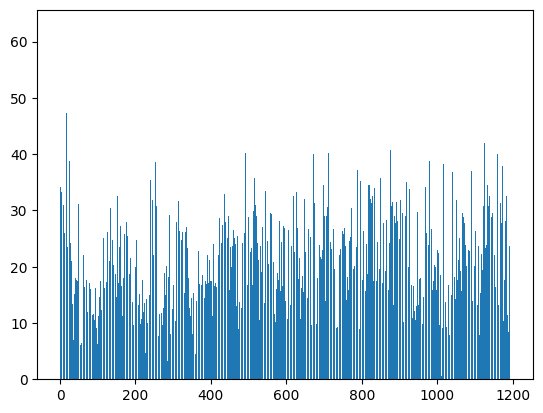

Index(['visit_month', 'GNPEPTFSWTK', 'TLKIENVSYQDKGNYR', 'QQETAAAETETR', 'THLGEALAPLSK', 'SEGLLAC(UniMod_4)GTNAR', 'AATVGSLAGQPLQER', 'AKLEEQAQQIR', 'DRLDEVKEQVAEVR', 'GEVQAMLGQSTEELRVR', 'LDEVKEQVAEVR', 'LEEQAQQIR', 'LGPLVEQGR', 'LQAEAFQAR', 'LSKELQAAQAR', 'WELALGR', 'LEPGQQEEYYR', 'GEAGAPGEEDIQGPTK', 'C(UniMod_4)APFFYGGC(UniMod_4)GGNR', 'VSEADIQR', 'DGGFC(UniMod_4)EVC(UniMod_4)KK', 'GLSAEPGWQAK', 'RLEGQEEEEDNRDSSMK', 'SEALAVDGAGKPGAEEAQDPEGK', 'FFLC(UniMod_4)QVAGDAK', 'LDIDSPPITAR', 'VGGVQSLGGTGALR', 'EAEEETTNDNGVLVLEPARK', 'VRQGQGQSEPGEYEQR', 'FIYGGC(UniMod_4)GGNR', 'QHVVYGPWNLPQSSYSHLTR', 'EGDMLTLFDGDGPSAR', 'TSTDLQVLAAR', 'VHKEDDGVPVIC(UniMod_4)QVEHPAVTGNLQTQR', 'QALPQVR', 'O15240', 'O75326', 'P02649', 'P05060', 'P05408', 'P10645', 'P13591', 'P14618', 'P17174', 'P43121', 'Q06481', 'Q6UXD5', 'Q96BZ4', 'Q9BY67', 'Q99829'], dtype='object')


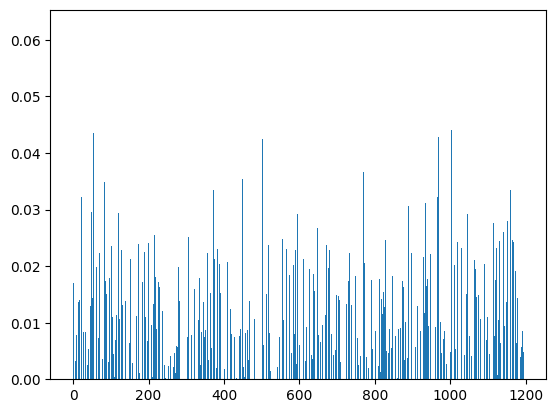

Index(['TQSSLVPALTDFVR', 'SPVGVQPILNEHTFC(UniMod_4)AGMSK', 'YVMLPVADQDQC(UniMod_4)IR', 'YGLVTYATYPK', 'LSSWVLLMK', 'FMQAVTGWK', 'AGDFLEANYMNLQR', 'TMQALPYSTVGNSNNYLHLSVLR', 'TVAAPSVFIFPPSDEQLK', 'AKLEEQAQQIR', 'LGADMEDVC(UniMod_4)GR', 'C(UniMod_4)PFPSRPDNGFVNYPAKPTLYYK', 'IGDTWSK', 'GSPAINVAVHVFRK', 'DKETC(UniMod_4)FAEEGKK', 'PTLVEVSR', 'KPVEEYANC(UniMod_4)HLAR', 'VVEQMC(UniMod_4)ITQYER', 'C(UniMod_4)LAPLEGAR', 'HGGLYHENMR', 'LEAGDHPVELLAR', 'LRENELTYYC(UniMod_4)C(UniMod_4)KK', 'MPC(UniMod_4)AELVREPGC(UniMod_4)GC(UniMod_4)C(UniMod_4)SVC(UniMod_4)AR', 'VLTPTQVK', 'FVEGLPINDFSR', 'C(UniMod_4)VC(UniMod_4)PVSNAMC(UniMod_4)R', 'DQC(UniMod_4)QVDSQC(UniMod_4)PGQMK', 'LLPAQLPAEKEVGPPLPQEAVPLQK', 'LVWEEAMSR', 'VVVNFAPTIQEIK', 'SPFEQHIK', 'ARAEAQEAEDQQAR', 'KLSSWVLLMK', 'INHC(UniMod_4)RFDEFFSEGC(UniMod_4)APGSKK', 'O00391', 'O15240', 'P01608', 'P02649', 'P02747', 'P02763', 'P04156', 'P04275', 'P06454', 'P08571', 'P09486', 'P24592', 'P40925', 'Q12805', 'Q6UXD5', 'Q9UBR2'], dtype='object')


TypeError: RFE.__init__() takes 2 positional arguments but 3 were given

In [ ]:
# Run feature selection on the updrs1 dataframe:


import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import RFE



# split into X and y:

y = df_clinical_updrs1["updrs_1"]
X = df_clinical_updrs1.drop(columns=["updrs_1"])

# feature selection with SelectKBest:
# select the 50 best features:

selector = SelectKBest(f_regression, k=50)
selector.fit(X, y)
X_new = selector.transform(X)

#plot the scores:
import matplotlib.pyplot as plt
plt.bar([i for i in range(len(selector.scores_))], selector.scores_)
plt.show()

# print the names of the selected features:
selected_features = X.columns[selector.get_support()]
print(selected_features)


# now do the same with mutual_info_regression:

selector = SelectKBest(mutual_info_regression, k=50)
selector.fit(X, y)
X_new = selector.transform(X)

#plot the scores:
import matplotlib.pyplot as plt
plt.bar([i for i in range(len(selector.scores_))], selector.scores_)
plt.show()

# print the names of the selected features:
selected_features = X.columns[selector.get_support()]
print(selected_features)


# now do the same with RFE:

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# create a base classifier used to evaluate a subset of attributes
model = LinearRegression()

# create the RFE model and select 50 attributes
rfe = RFE(model, 50)

# fit the model
rfe = rfe.fit(X, y)

# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)
print(rfe.estimator_)
print(rfe.n_features_)
print(rfe.n_features_to_select_)
print(rfe.score(X, y))

# print the names of the selected features:
selected_features = X.columns[rfe.get_support()]
print(selected_features)




In [ ]:
# train a model with the selected features:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#USE SMAPE AS METRIC:
def smape(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred))) * 100


X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("SMAPE: ", smape(y_test, y_pred))



RMSE:  5.640451407200245
SMAPE:  34.62012353848915
